**BUILD MODEL**

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# use linear regression formula to make a straight line with known parameters

#create known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
# create train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [8]:
# visualize the data
def plot_predict(train_data = X_train,
                 train_labels = y_Train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
  plt.figure(figsize=(8, 6))

  plt.scatter(train_data, train_labels, c="b", s=4, label="training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size": 14});

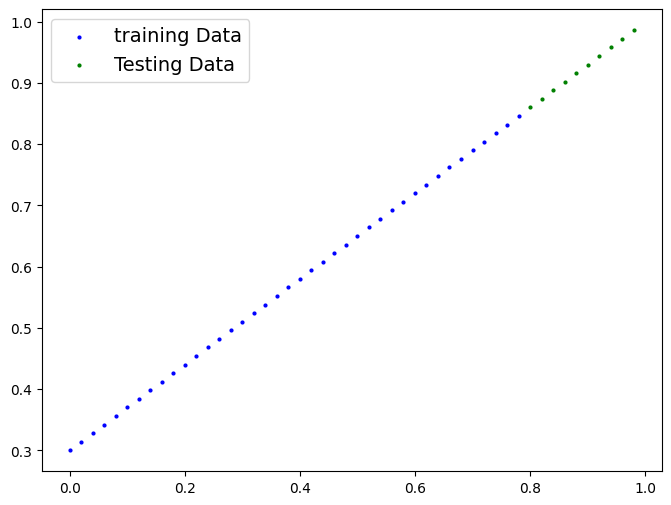

In [9]:
plot_predict(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)


In [32]:
class LinearRegressionModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
# pytorch model building classes
# torch.nn -> contaions all building blocks for nn
# torch.nn.Parameter -> wt parameters should our model try and learn
# torch.nn.module -> the base class for all nn modules, u should overwrite forward()
# torch.optim -> help optimizing with gradient descent
# def forward() -> all nn.module subclasses requires it, helps define wt happens in forward computation


In [33]:
#checking the contents of our model

#create a rand seed

torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [35]:
weight, bias

(0.7, 0.3)

In [36]:
# making predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

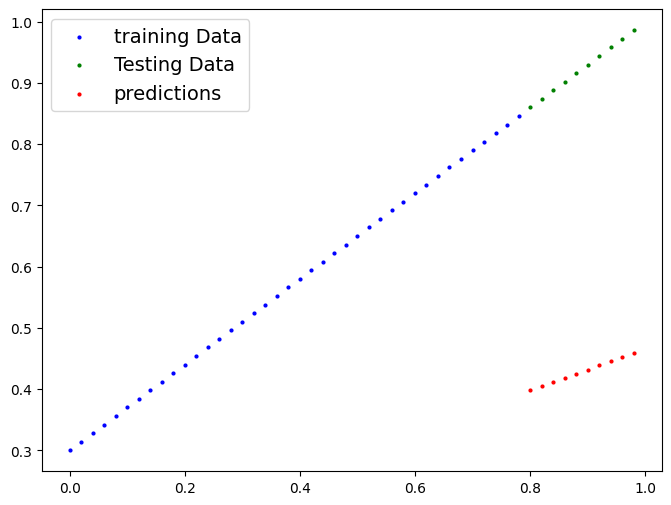

In [37]:
plot_predict(predictions=y_preds)

In [38]:
# train model

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [40]:
# setting up a loss function and optimizer

loss_fn = nn.L1Loss() #loss function
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr= learning rate

In [41]:
model_0.parameters()

<generator object Module.parameters at 0x7838822d9850>

In [96]:
# building a trining loop

epochs = 1 #epoch is 1 loop through the data

for epoch in range(epochs):
  model_0.train()

  #1.Forward pass
  y_pred = model_0(X_train)
  #2.calcu the loss
  loss = loss_fn(y_pred, y_train)
  #3. optimizer zero grad
  optimizer.zero_grad()
  #4. perform backpropagation on the loss w.r.t parameters of model
  loss.backward()
  #5. step the optimizer
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_pred = loss_fn(test_pred, y_test)  #turns off the gradient tracking



In [97]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [98]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [87]:
weight, bias

(0.7, 0.3)

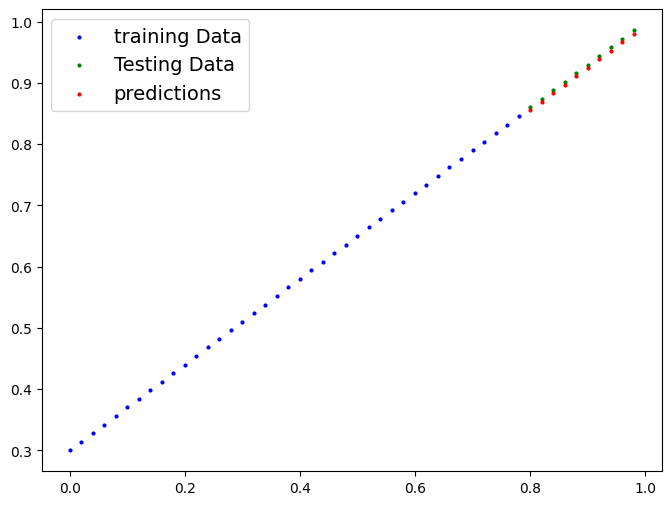

In [99]:
plot_predict(predictions=y_preds_new);